# Porn use and later self-objectification among high school students
### Annie Maheux

In [2]:
#read in data
data <- read.csv("~/Github_Repo/PornSO_Data.csv")
names(data)

[1] "gender"              "gendertrans"         "mediaskepT1"        
 [4] "OBC_scale_T1"        "OBC_surveillance_T1" "OBC_shame_T1"       
 [7] "OBC_scale_T2"        "OBC_surveillance_T2" "OBC_shame_T2"       
[10] "pornpastyearT1"      "pornpastyearT1di"    "ParSexPosCom_T1"    
[13] "ParPornCom_T1"       "ParPornComdi_T1"     "TotalParSexCom_T1"  
[16] "sextouch_ever"       "sexintercourse_ever"

## Variables

Gender (one variable with trans kids coded as missing, another dichotomous of trans vs. cis)

Condition (may need to control for intervention condition

Sexual activity status (by sexual touching and by sexual intercourse)

OBC scale and subscales (at T1 and T2):

- Full scale

- Surveillance subscale

- Body shame subscale

Porn in past year (at T1) (on scale from 0 - 2)

Parental communication on sexual topics:

- Total scale

- About porn (1 item)

- About what feels good about sex (1 item)

Media skepticism scale (“media” items only, not social media)


In [7]:
# descriptives for OBC and porn by gender, then moderators by gender

library(tidyverse)
data %>% group_by(gender) %>% select(gender, OBC_scale_T1, OBC_scale_T2,
                                                  OBC_surveillance_T1, OBC_surveillance_T2, OBC_shame_T1,
                                                  OBC_shame_T2, pornpastyearT1) %>% na.omit() %>% summarize(meanOBCT1 = mean(OBC_scale_T1), meanOBCT2 = mean(OBC_scale_T2),
                                                     meanOBC_surveillanceT1 = mean(OBC_surveillance_T1), meanOBC_surveillanceT2 = mean(OBC_surveillance_T2),
                                                     meanOBC_shameT1 = mean(OBC_shame_T1), meanOBC_shameT2 = mean(OBC_shame_T2), pornpastyear=mean(pornpastyearT1), n =n())

                    
data %>% group_by(gender) %>% select(gender, ParPornCom_T1, ParSexPosCom_T1, mediaskepT1) %>% na.omit() %>% summarize(ParentPornComm = mean(ParPornCom_T1), ParentSexPosCom = mean(ParSexPosCom_T1),
                                                                                                                      MediaSkepticism= mean(mediaskepT1), n = n())



gender,meanOBCT1,meanOBCT2,meanOBC_surveillanceT1,meanOBC_surveillanceT2,meanOBC_shameT1,meanOBC_shameT2,pornpastyear,n
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,4.151389,3.867361,4.604167,4.334722,3.698611,3.400000,0.8666667,90
1,3.251712,3.140411,3.594178,3.625000,2.909247,2.655822,1.8767123,73


gender,ParentPornComm,ParentSexPosCom,MediaSkepticism,n
<int>,<dbl>,<dbl>,<dbl>,<int>
0,0.1868132,0.08791209,5.019780,91
1,0.1643836,0.19178082,4.617808,73


In [8]:
# models with gender as covariate
model1 <- lm(OBC_scale_T2~pornpastyearT1 + gender + OBC_scale_T1, data=data)
summary(model1)

model2 <- lm(OBC_surveillance_T2~pornpastyearT1 + gender + OBC_surveillance_T1, data=data)
summary(model2)

model3 <- lm(OBC_shame_T2~pornpastyearT1 + gender + OBC_shame_T1, data=data)
summary(model3)



Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 + gender + OBC_scale_T1, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87908 -0.44386  0.09719  0.46160  2.03420 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.36919    0.24077   5.687 6.05e-08 ***
pornpastyearT1 -0.10462    0.04779  -2.189    0.030 *  
gender         -0.06023    0.13339  -0.452    0.652    
OBC_scale_T1    0.62361    0.05704  10.934  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6829 on 159 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5102,	Adjusted R-squared:  0.5009 
F-statistic:  55.2 on 3 and 159 DF,  p-value: < 2.2e-16



Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 + gender + 
    OBC_surveillance_T1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39169 -0.50182  0.07897  0.56652  3.12874 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.82392    0.29975   6.085 8.30e-09 ***
pornpastyearT1      -0.08505    0.06594  -1.290    0.199    
gender              -0.01401    0.18150  -0.077    0.939    
OBC_surveillance_T1  0.56134    0.06382   8.795 2.16e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9409 on 160 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3857,	Adjusted R-squared:  0.3742 
F-statistic: 33.49 on 3 and 160 DF,  p-value: < 2.2e-16



Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 + gender + OBC_shame_T1, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8294 -0.5001  0.0425  0.4466  3.2878 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.77117    0.24409   7.256 1.65e-11 ***
pornpastyearT1 -0.11048    0.06035  -1.831    0.069 .  
gender         -0.26453    0.16201  -1.633    0.104    
OBC_shame_T1    0.46628    0.06154   7.577 2.74e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8815 on 159 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3527,	Adjusted R-squared:  0.3405 
F-statistic: 28.87 on 3 and 159 DF,  p-value: 5.858e-15


### Porn in past year is a significant predictor of the full OBC scale and almost significant for the shame subscale, but not for the surveillance subscale. 

In [9]:
# models with gender interaction
model1 <- lm(OBC_scale_T2~pornpastyearT1*gender + OBC_scale_T1, data=data)
summary(model1)

model2 <- lm(OBC_surveillance_T2~pornpastyearT1*gender + OBC_surveillance_T1, data=data)
summary(model2)

model3 <- lm(OBC_shame_T2~pornpastyearT1*gender + OBC_shame_T1, data=data)
summary(model3)


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * gender + OBC_scale_T1, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93501 -0.42745  0.08657  0.45225  1.98091 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.40576    0.24105   5.832    3e-08 ***
pornpastyearT1        -0.16930    0.06416  -2.639  0.00916 ** 
gender                -0.25184    0.18410  -1.368  0.17328    
OBC_scale_T1           0.62830    0.05690  11.043  < 2e-16 ***
pornpastyearT1:gender  0.13915    0.09255   1.504  0.13469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6802 on 158 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5171,	Adjusted R-squared:  0.5048 
F-statistic: 42.29 on 4 and 158 DF,  p-value: < 2.2e-16



Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * gender + 
    OBC_surveillance_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3958 -0.4918  0.0873  0.5560  3.1989 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.85845    0.30627   6.068 9.14e-09 ***
pornpastyearT1        -0.11888    0.08832  -1.346    0.180    
gender                -0.11756    0.25549  -0.460    0.646    
OBC_surveillance_T1    0.56021    0.06399   8.755 2.85e-15 ***
pornpastyearT1:gender  0.07328    0.12698   0.577    0.565    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9429 on 159 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.387,	Adjusted R-squared:  0.3716 
F-statistic:  25.1 on 4 and 159 DF,  p-value: 4.017e-16



Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 * gender + OBC_shame_T1, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7240 -0.5356  0.0857  0.4674  3.2534 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.79481    0.24541   7.314 1.23e-11 ***
pornpastyearT1        -0.16400    0.08239  -1.991   0.0483 *  
gender                -0.42140    0.23078  -1.826   0.0697 .  
OBC_shame_T1           0.47243    0.06189   7.633 2.04e-12 ***
pornpastyearT1:gender  0.11498    0.12044   0.955   0.3412    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8817 on 158 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3564,	Adjusted R-squared:  0.3401 
F-statistic: 21.87 on 4 and 158 DF,  p-value: 2.22e-14


### Porn in past year is still significant for the full scale and now is significant for the shame subscale, but there is no interaction between gender and porn on any OBC outcome

In [12]:
#parental communication about porn

model1 <- lm(OBC_scale_T2~pornpastyearT1*ParPornCom_T1 + gender + OBC_scale_T1, data=data)
summary(model1)
library(interactions)
sim_slopes(model1, pred = pornpastyearT1, modx=ParPornCom_T1)

model2 <- lm(OBC_surveillance_T2~pornpastyearT1*ParPornCom_T1 + gender + OBC_surveillance_T1, data=data)
summary(model2)

model3 <- lm(OBC_shame_T2~pornpastyearT1*ParPornCom_T1 + gender + OBC_shame_T1, data=data)
summary(model3)


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * ParPornCom_T1 + 
    gender + OBC_scale_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8345 -0.4584  0.1074  0.4869  2.0865 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.26839    0.24767   5.121 8.79e-07 ***
pornpastyearT1               -0.07080    0.05051  -1.402   0.1630    
ParPornCom_T1                 0.27177    0.18388   1.478   0.1414    
gender                       -0.03709    0.13384  -0.277   0.7821    
OBC_scale_T1                  0.63723    0.05732  11.117  < 2e-16 ***
pornpastyearT1:ParPornCom_T1 -0.18199    0.08816  -2.064   0.0406 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.678 on 157 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5232,	Adjusted R-squared:  0.508 
F-statistic: 34.45 on 5 and 157 DF,  p-value: < 2.2e-16


Warning message:
“-0.279132843945451 is outside the observed range of ParPornCom_T1”


JOHNSON-NEYMAN INTERVAL 

When ParPornCom_T1 is OUTSIDE the interval [-13.22, 0.13], the
slope of pornpastyearT1 is p < .05.

Note: The range of observed values of ParPornCom_T1 is [0.00,
2.00]

SIMPLE SLOPES ANALYSIS 

Slope of pornpastyearT1 when ParPornCom_T1 = -0.28 (- 1 SD): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.02   0.06    -0.32   0.75

Slope of pornpastyearT1 when ParPornCom_T1 =  0.18 (Mean): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.10   0.05    -2.15   0.03

Slope of pornpastyearT1 when ParPornCom_T1 =  0.63 (+ 1 SD): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.19   0.06    -2.98   0.00



Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * ParPornCom_T1 + 
    gender + OBC_surveillance_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4287 -0.5195  0.0774  0.5789  3.1684 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.7622061  0.3125440   5.638 7.72e-08 ***
pornpastyearT1               -0.0616482  0.0702673  -0.877    0.382    
ParPornCom_T1                 0.1750439  0.2559548   0.684    0.495    
gender                        0.0008412  0.1840850   0.005    0.996    
OBC_surveillance_T1           0.5685836  0.0648261   8.771 2.68e-15 ***
pornpastyearT1:ParPornCom_T1 -0.1248639  0.1226725  -1.018    0.310    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9437 on 158 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3898,	Adjusted R-squared:  0.3705 
F-statistic: 20.19 on 5 and 158 DF


Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 * ParPornCom_T1 + 
    gender + OBC_shame_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9139 -0.5731  0.0728  0.5273  3.3416 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.70670    0.25027   6.819 1.86e-10 ***
pornpastyearT1               -0.07131    0.06449  -1.106    0.271    
ParPornCom_T1                 0.24135    0.23651   1.020    0.309    
gender                       -0.25352    0.16251  -1.560    0.121    
OBC_shame_T1                  0.47241    0.06162   7.666 1.73e-12 ***
pornpastyearT1:ParPornCom_T1 -0.18871    0.11372  -1.659    0.099 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.879 on 157 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.3644,	Adjusted R-squared:  0.3442 
F-statistic:    18 on 5 and 157 DF,  p-value: 4.314e-14


### Parental communication frequency about pornography is not linearly associated with OBC outcomes. 


### However, parental communication about porn interacts with porn consumption in past year such that at high levels of parental communication about porn, viewing porn is negatively associated with the full OBC scale (subscale of body shame not quite significant, no effect for surveillance). At low levels of parental communication about porn (essential no communication), there is no effect of pornography on the OBC scale.

In [13]:
model1 <- lm(OBC_scale_T2~pornpastyearT1*ParPornCom_T1*gender + OBC_scale_T1, data=data)
summary(model1)

model1 <- lm(OBC_surveillance_T2~pornpastyearT1*ParPornCom_T1*gender + OBC_surveillance_T1, data=data)
summary(model1)

model1 <- lm(OBC_shame_T2~pornpastyearT1*ParPornCom_T1*gender + OBC_shame_T1, data=data)
summary(model1)


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * ParPornCom_T1 * 
    gender + OBC_scale_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8841 -0.4551  0.0789  0.4435  2.0382 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.30783    0.24965   5.239 5.24e-07 ***
pornpastyearT1                      -0.11172    0.06951  -1.607   0.1100    
ParPornCom_T1                        0.26593    0.19261   1.381   0.1694    
gender                              -0.20338    0.19076  -1.066   0.2880    
OBC_scale_T1                         0.63971    0.05759  11.108  < 2e-16 ***
pornpastyearT1:ParPornCom_T1        -0.24781    0.11388  -2.176   0.0311 *  
pornpastyearT1:gender                0.09391    0.09965   0.942   0.3475    
ParPornCom_T1:gender                -0.07320    0.64688  -0.113   0.9100    
pornpastyearT1:ParPornCom_T1:gender  0.14452    0.25747   0.561   0.5754    
---
Signif. 


Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * ParPornCom_T1 * 
    gender + OBC_surveillance_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4280 -0.5296  0.0553  0.5527  3.1793 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.79918    0.32208   5.586 1.02e-07 ***
pornpastyearT1                      -0.07878    0.09679  -0.814    0.417    
ParPornCom_T1                        0.22940    0.27043   0.848    0.398    
gender                              -0.04208    0.26783  -0.157    0.875    
OBC_surveillance_T1                  0.56364    0.06543   8.615 7.55e-15 ***
pornpastyearT1:ParPornCom_T1        -0.17300    0.15965  -1.084    0.280    
pornpastyearT1:gender                0.03241    0.13815   0.235    0.815    
ParPornCom_T1:gender                -0.74558    0.90302  -0.826    0.410    
pornpastyearT1:ParPornCom_T1:gender  0.31291    0.35959   0.870    0.386   


Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 * ParPornCom_T1 * 
    gender + OBC_shame_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9043 -0.5429  0.0626  0.4914  3.3120 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          1.72531    0.25244   6.835 1.80e-10 ***
pornpastyearT1                      -0.09142    0.08974  -1.019   0.3100    
ParPornCom_T1                        0.22282    0.24872   0.896   0.3717    
gender                              -0.39816    0.23985  -1.660   0.0989 .  
OBC_shame_T1                         0.47869    0.06218   7.698 1.55e-12 ***
pornpastyearT1:ParPornCom_T1        -0.29323    0.14756  -1.987   0.0487 *  
pornpastyearT1:gender                0.05742    0.12989   0.442   0.6590    
ParPornCom_T1:gender                 0.19801    0.83904   0.236   0.8137    
pornpastyearT1:ParPornCom_T1:gender  0.12454    0.33397   0.373   0.7097    
---
Signif. 

### There are no three-way interactions with porn consumption, parental communication about porn, and gender on any OBC outcome

In [15]:
model1 <- lm(OBC_scale_T2~pornpastyearT1*ParSexPosCom_T1 + gender + OBC_scale_T1, data=data)
summary(model1)

model2 <- lm(OBC_surveillance_T2~pornpastyearT1*ParSexPosCom_T1 + gender + OBC_surveillance_T1, data=data)
summary(model2)

model3 <- lm(OBC_shame_T2~pornpastyearT1*ParSexPosCom_T1 + gender + OBC_shame_T1, data=data)
summary(model3)


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * ParSexPosCom_T1 + 
    gender + OBC_scale_T1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89770 -0.44571  0.09672  0.44042  2.01347 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.40334    0.24425   5.746 4.62e-08 ***
pornpastyearT1                 -0.11832    0.04939  -2.395   0.0178 *  
ParSexPosCom_T1                -0.14515    0.17382  -0.835   0.4050    
gender                         -0.06713    0.13466  -0.499   0.6188    
OBC_scale_T1                    0.61984    0.05728  10.822  < 2e-16 ***
pornpastyearT1:ParSexPosCom_T1  0.14066    0.11567   1.216   0.2258    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.684 on 157 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.5147,	Adjusted R-squared:  0.4993 
F-statistic: 33.31 on 5 and 157 DF,  


Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * ParSexPosCom_T1 + 
    gender + OBC_surveillance_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4132 -0.5405  0.1251  0.5658  3.0747 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.88370    0.30341   6.209 4.52e-09 ***
pornpastyearT1                 -0.10663    0.06800  -1.568    0.119    
ParSexPosCom_T1                -0.28158    0.23859  -1.180    0.240    
gender                         -0.01436    0.18374  -0.078    0.938    
OBC_surveillance_T1             0.55597    0.06405   8.680 4.60e-15 ***
pornpastyearT1:ParSexPosCom_T1  0.19584    0.15941   1.229    0.221    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9417 on 158 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3924,	Adjusted R-squared:  0.3732 
F-statistic: 20.41 on 5 and 158 


Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 * ParSexPosCom_T1 + 
    gender + OBC_shame_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8101 -0.4816  0.0423  0.4534  3.2745 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.78473    0.24942   7.156  3.0e-11 ***
pornpastyearT1                 -0.12125    0.06281  -1.931   0.0553 .  
ParSexPosCom_T1                -0.09866    0.22500  -0.438   0.6616    
gender                         -0.26912    0.16395  -1.641   0.1027    
OBC_shame_T1                    0.46617    0.06205   7.513  4.1e-12 ***
pornpastyearT1:ParSexPosCom_T1  0.11126    0.14954   0.744   0.4580    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8855 on 157 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.355,	Adjusted R-squared:  0.3344 
F-statistic: 17.28 on 5 and 157 DF,  p-value: 1

### Parental communication about "what feels good about sex" is not associated with later self-objectification nor does it interact with porn consumption in predicting self-objectification

In [17]:
#models with sexual activity status
model1 <- lm(OBC_scale_T2~pornpastyearT1*sexintercourse_ever + gender + OBC_scale_T1, data=data)
summary(model1)

model2 <- lm(OBC_surveillance_T2~pornpastyearT1*sexintercourse_ever + gender + OBC_surveillance_T1, data=data)
summary(model2)
sim_slopes(model2, pred=pornpastyearT1, modx=sexintercourse_ever)

model3  <- lm(OBC_shame_T2~pornpastyearT1*sexintercourse_ever + gender + OBC_shame_T1, data=data)
summary(model3)


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * sexintercourse_ever + 
    gender + OBC_scale_T1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65280 -0.47161  0.04629  0.48147  2.26568 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1.104817   0.275770   4.006 0.000109 ***
pornpastyearT1                     -0.041101   0.080407  -0.511 0.610208    
sexintercourse_ever                 0.337308   0.189515   1.780 0.077720 .  
gender                              0.009476   0.153833   0.062 0.950986    
OBC_scale_T1                        0.632844   0.066095   9.575 2.36e-16 ***
pornpastyearT1:sexintercourse_ever -0.134852   0.101204  -1.332 0.185315    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6858 on 116 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.5365,	Adjusted R-squared:  0.51


Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * sexintercourse_ever + 
    gender + OBC_surveillance_T1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.20080 -0.57577 -0.02004  0.62002  2.71060 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1.51029    0.34839   4.335 3.10e-05 ***
pornpastyearT1                      0.06414    0.11102   0.578  0.56453    
sexintercourse_ever                 0.81732    0.26003   3.143  0.00212 ** 
gender                             -0.03604    0.20690  -0.174  0.86201    
OBC_surveillance_T1                 0.53137    0.07308   7.271 4.36e-11 ***
pornpastyearT1:sexintercourse_ever -0.28017    0.13960  -2.007  0.04705 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9589 on 117 degrees of freedom
  (46 observations deleted due to missingness)
Multiple R-squared:  0.4148,	Adjusted R-squared

JOHNSON-NEYMAN INTERVAL 

When sexintercourse_ever is OUTSIDE the interval [-25.77, 0.83],
the slope of pornpastyearT1 is p < .05.

Note: The range of observed values of sexintercourse_ever is
[0.00, 1.00]

SIMPLE SLOPES ANALYSIS 

Slope of pornpastyearT1 when sexintercourse_ever = 0.00 (0): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.06   0.11     0.58   0.56

Slope of pornpastyearT1 when sexintercourse_ever = 1.00 (1): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.22   0.10    -2.22   0.03



Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1 * sexintercourse_ever + 
    gender + OBC_shame_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7212 -0.4547  0.0463  0.4244  3.4975 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1.47475    0.30196   4.884 3.36e-06 ***
pornpastyearT1                     -0.06724    0.10320  -0.652    0.516    
sexintercourse_ever                 0.06382    0.24911   0.256    0.798    
gender                             -0.13263    0.19314  -0.687    0.494    
OBC_shame_T1                        0.51586    0.07499   6.879 3.24e-10 ***
pornpastyearT1:sexintercourse_ever -0.08649    0.13288  -0.651    0.516    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9022 on 116 degrees of freedom
  (47 observations deleted due to missingness)
Multiple R-squared:  0.3707,	Adjusted R-squared:  0.3435 
F-statistic: 

### Ever having intercourse is associated with  more body surveillance and interacts with porn consumption to predict body surveillance. 

### For people who have ever had sex, watching porn is associated with less body surveillance. Porn is not associated with body surveillance for people who have never had sex.


Call:
lm(formula = OBC_scale_T2 ~ pornpastyearT1 * mediaskepT1 + gender + 
    OBC_scale_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8228 -0.4314  0.1099  0.4690  1.9743 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.11414    0.49438   2.254   0.0256 *  
pornpastyearT1             -0.08288    0.22329  -0.371   0.7110    
mediaskepT1                 0.05628    0.09369   0.601   0.5489    
gender                     -0.04742    0.13649  -0.347   0.7287    
OBC_scale_T1                0.61723    0.05808  10.628   <2e-16 ***
pornpastyearT1:mediaskepT1 -0.00476    0.04435  -0.107   0.9147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6875 on 156 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.5128,	Adjusted R-squared:  0.4971 
F-statistic: 32.83 on 5 and 156 DF,  p-value: < 2.2e-16



Call:
lm(formula = OBC_surveillance_T2 ~ pornpastyearT1 * mediaskepT1 + 
    gender + OBC_surveillance_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4471 -0.4654  0.1012  0.5356  3.3493 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.87790    0.65141   4.418 1.85e-05 ***
pornpastyearT1             -0.71740    0.30642  -2.341   0.0205 *  
mediaskepT1                -0.23215    0.12752  -1.821   0.0706 .  
gender                      0.01575    0.18378   0.086   0.9318    
OBC_surveillance_T1         0.58034    0.06459   8.986 7.70e-16 ***
pornpastyearT1:mediaskepT1  0.12786    0.06052   2.113   0.0362 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9362 on 157 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.4032,	Adjusted R-squared:  0.3841 
F-statistic: 21.21 on 5 and 157 DF,  p-value: 3.585e-16


JOHNSON-NEYMAN INTERVAL 

When mediaskepT1 is OUTSIDE the interval [4.52, 15.94], the slope
of pornpastyearT1 is p < .05.

Note: The range of observed values of mediaskepT1 is [2.20, 7.00]

SIMPLE SLOPES ANALYSIS 

Slope of pornpastyearT1 when mediaskepT1 = 3.90 (- 1 SD): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.22   0.09    -2.40   0.02

Slope of pornpastyearT1 when mediaskepT1 = 4.86 (Mean): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.10   0.07    -1.46   0.15

Slope of pornpastyearT1 when mediaskepT1 = 5.81 (+ 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.03   0.08     0.31   0.76



Call:
lm(formula = OBC_shame_T2 ~ pornpastyearT1di * mediaskepT1 + 
    gender + OBC_shame_T1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8674 -0.5416  0.0625  0.4474  2.7863 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -0.48921    0.64859  -0.754 0.451824    
pornpastyearT1di              1.97789    0.74287   2.662 0.008570 ** 
mediaskepT1                   0.46411    0.12308   3.771 0.000231 ***
gender                       -0.23601    0.15776  -1.496 0.136670    
OBC_shame_T1                  0.45330    0.05965   7.600 2.58e-12 ***
pornpastyearT1di:mediaskepT1 -0.45086    0.14953  -3.015 0.003000 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8557 on 156 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.4014,	Adjusted R-squared:  0.3823 
F-statistic: 20.93 on 5 and 156 DF,  p-value: 5.71e-16


JOHNSON-NEYMAN INTERVAL 

When mediaskepT1 is OUTSIDE the interval [3.01, 5.04], the slope
of pornpastyearT1di is p < .05.

Note: The range of observed values of mediaskepT1 is [2.20, 7.00]

SIMPLE SLOPES ANALYSIS 

Slope of pornpastyearT1di when mediaskepT1 = 3.90 (- 1 SD): 

  Est.   S.E.   t val.      p
------ ------ -------- ------
  0.22   0.21     1.07   0.29

Slope of pornpastyearT1di when mediaskepT1 = 4.85 (Mean): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.21   0.15    -1.43   0.15

Slope of pornpastyearT1di when mediaskepT1 = 5.81 (+ 1 SD): 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.64   0.20    -3.16   0.00


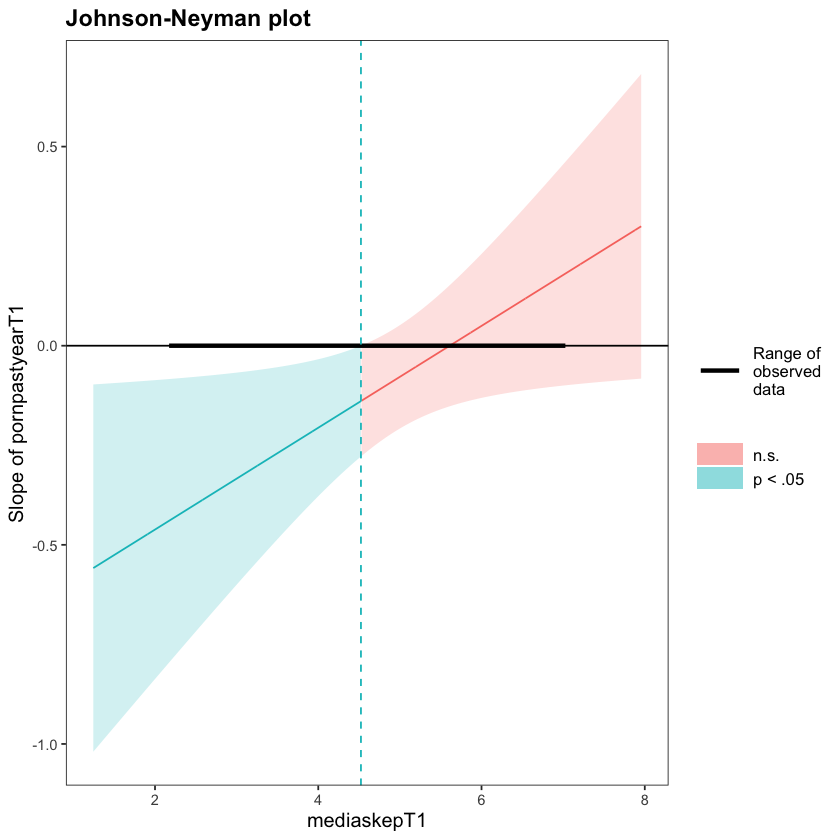

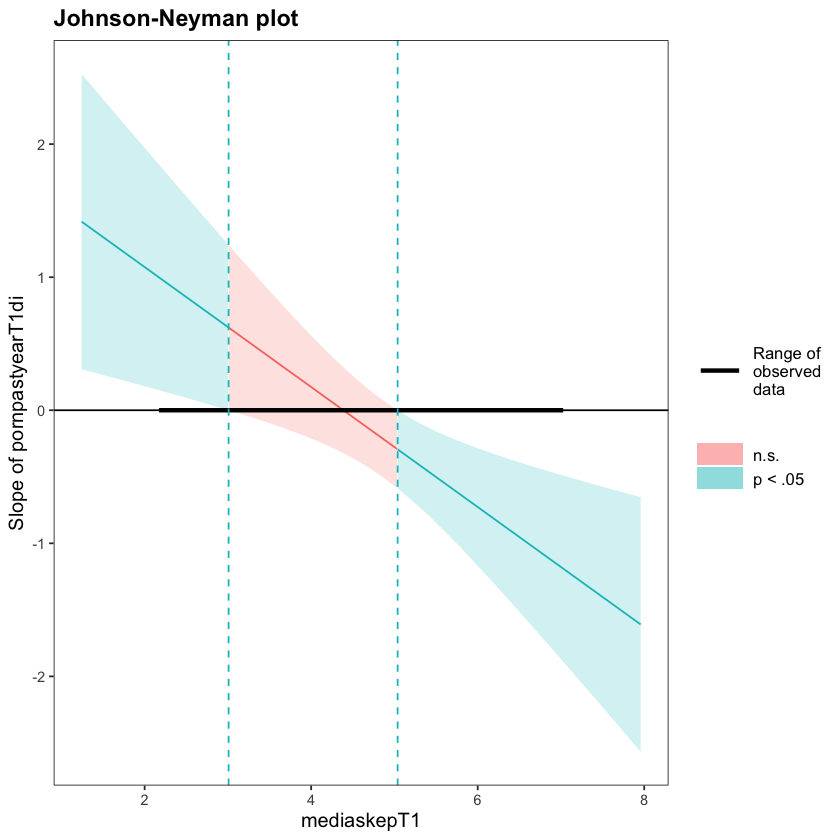

In [18]:
#models with media skepticism
model1 <- lm(OBC_scale_T2~pornpastyearT1*mediaskepT1 + gender + OBC_scale_T1, data=data)
summary(model1)

model1 <- lm(OBC_surveillance_T2~pornpastyearT1*mediaskepT1 + gender + OBC_surveillance_T1, data=data)
summary(model1)
#media skepticism positively assoc with surveillance (when porn is continuous not dichotomous)
library(interactions)
sim_slopes(model1, pred=pornpastyearT1, modx=mediaskepT1, jnplot=T)

model1 <- lm(OBC_shame_T2~pornpastyearT1di*mediaskepT1 + gender + OBC_shame_T1, data=data)
summary(model1)
#media skepticism negativey associated with shame
sim_slopes(model1, pred=pornpastyearT1di, modx=mediaskepT1, jnplot=T)

### Media skepticism is negatively associated with body surveillance but positively associated with body shame (?)

### Media skepticism interacts with porn consumption to predict body surveillance and body shame but in opposite directions. There is no interaction for the full OBC subscale because these effects are suppressing the other.

### When media skepticism is low, more porn consumption is associated with less body surveillance. When media skepticism is high, there is no effect of porn consumption on body surveillance. (this makes sense, media skepticism is buffering the effect of porn consumption on body surveillance).

### When media skepticism is high, more porn consumption is associated with less body shame. When media skepticism is low, there is no effect of porn consumption on body shame. (this makes less sense, but potentially shows a beneficial effect of porn consumption when kids have the media literacy skills to understand what they are viewing. This seems less like a buffering effect and more like a mechanism through which porn use is associated with better outcomes). 